# Map vs FlatMap

TWhat is the difference between Spark map() vs flatMap() is a most asked interview question, if you are taking an interview on Spark (Java/Scala/PySpark), so let’s understand the differences with examples? Regardless of an interview, you have to know the differences as this is also one of the most used Spark transformations.

- map() – Spark map() transformation applies a function to each row in a DataFrame/Dataset and returns the new transformed Dataset.
- flatMap() – Spark flatMap() transformation flattens the DataFrame/Dataset after applying the function on every element and returns a new transformed Dataset. The returned Dataset will return more rows than the current DataFrame. 

Let us consider a input file as a text file and it contains some sentence in it as shown below. 

Our task is to apply both map and flat map transformation one by one and observe the results produced to understand the working and gain knowledge on where to use Map and Flatmap.

We do this by applying split() function on top Map() and FlatMap() in PySpark. 


In [ ]:
#Reading the file into a rdd
input_rdd= sc.textFile("./inputfile.txt")
input_rdd.collect()

In [ ]:
#Number of rdds
input_rdd.count()

### Map Operation

Map is a type of Spark Transformation, which is used to perform operation on the record level. Spark Map operation applies logic to be performed, defined by the custom code of developers on each collections in RDD and provides the results for each row as a new collection of RDD. 


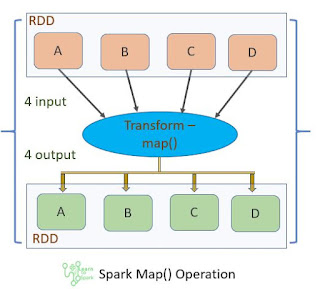

In simple words, Map transformation transforms the collection of RDD of given length say L into processed RDD of the same length L. Typically, the number of records or elements between input and output RDD will remains same. Now it time for some hands-on, let us apply map operation to the given input file with split function in it and check the count of input and output lines of records produced.

In [ ]:
map_rdd=input_rdd.map(lambda x: x.split(' '))
map_rdd.collect()

In [ ]:
print(input_rdd.count())
print(map_rdd.count())

From the output, it is evident that while using map function number of output records will exactly match the number of input records passed to process. We can check the number of records by using count() function as shown in the below diagram. We can observe both input and output have record count of 5.

### FlatMap operation

FlatMap in Apache Spark is a transformation operation that results in zero or more elements to the each element present in the input RDD. It is similar to the Map function, it applies the user built logic to the each records in the RDD and returns the output records as new RDD. In flatmap(), if the input RDD with length say L is passed on to the user defined logic, then it produces the output RDD of  different length say M. 

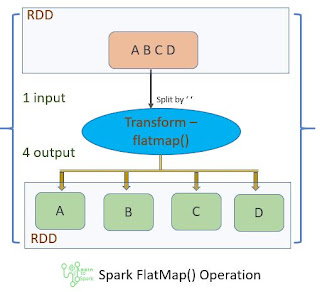

In [ ]:
flatmap_rdd=input_rdd.flatMap(lambda x: x.split(' '))
flatmap_rdd.collect()


We can observe that the number of input rows passed to flatmap is not equal to the number of output we got. By applying the count() function on top of flatmap_rdd, we can get the number of records in it. 

In [ ]:
print(input_rdd.count())
print(flatmap_rdd.count())

We can notice the input RDD has 5 records whereas output flatten RDD has 18 records. Flatmap() is usually used in getting the number of words. 

As follows, we have another two (similar) flatMap examples

In [ ]:
# Example 1
d1 = ["This is an sample application to see the FlatMap operation in PySpark"] 
rdd1 = sc.parallelize(d1)
rdd2 = rdd1.flatMap(lambda x: x.split(" "))
rdd2.foreach(print)

In [ ]:
#Example 2
sc.parallelize([3,4,5]).flatMap(lambda x: range(1,x)).collect()

In [ ]:
input_rdd.collect()

In [ ]:
#Example 3 - Wordcount using flatMap vs Map

## Here we are going ot use flatMap as the second fuction, to split the words.
input_rdd= sc.textFile("./inputfile2.txt")
input_rdd.collect()


In [ ]:
# We have as many records as lines
input_rdd.count()

In [ ]:
#flatMap  flattens the results, creating as many records as words. 
wordCountf = input_rdd.flatMap(lambda line: line.split())
wordCountf.collect()

In [ ]:
#Using flaMap we have 1 record per word 
wordCountf.count()

In [ ]:
wordmapf=wordCountf.map(lambda word: (word, 1))
wordmapf.collect()

In [ ]:
wordmapf.count()

In [ ]:
wordreducef=wordmapf.reduceByKey(lambda a, b: a+b)
wordreducef.collect()

In [ ]:
wordreducef.count()

In [ ]:
#Lets do it again, but using map instead of flatMap as the second function. 
input_rdd= sc.textFile("./inputfile2.txt")
input_rdd.collect()

In [ ]:
#we have one rdd per line
input_rdd.count()

In [ ]:
#map will create create a list per initial record. In those lists, we will have the words per line.
#but still we have 1 record per line. Only now, each rdd, will have a list of words.  
wordCountm = input_rdd.map(lambda line: line.split())
wordCountm.collect()

In [ ]:
#Using Map HER we have 1 record per line. 
wordCountm.count()

In [ ]:
wordmapm=wordCountm.map(lambda word: (word, 1))
wordmapm.collect()

In [ ]:
#These will give us an error
#wordreducem=wordmapm.reduceByKey(lambda a, b: a+b)
#wordreducem.collect()